### DOMAIN: 
Automotive Surveillance

### CONTEXT:
Computer  vision  can  be  used  to  automate  supervision  and  generate  action  appropriate  action  trigger  if  the  event  is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.

### DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

#### Train Images: 
Consists of real images of cars as per the make and year of the car. ‣Test Images: Consists of real images of cars as per the make and year of the car.
#### Train Annotation:
Consists of bounding box region for training images.
#### Test Annotation:
Consists of bounding box region for testing images.

## Import Required Python Library

In [28]:
import os
import numpy as np #library used for working with arrays
import pandas as pd #library used for data manipulation and analysis
import matplotlib.pyplot as plt
import cv2 #library used for image, video processing, manipulation, and analysis.
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.patches as patches
import glob # for file path handling
from PIL import Image # For image loading and manipulation
import xml.etree.ElementTree as ET # For handling XML annotations (common for object detection datasets)
import matplotlib.pyplot as plt #library for plots and visualisations
from sklearn.model_selection import train_test_split # For potential data splitting if needed
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical #library used to convert class vectors into binary class matrices

In [29]:
# Define paths
dataset_path = 'B:/AIML/Project/Capstone Project' # Replace with the actual path

# for images
train_images_path = os.path.join(dataset_path, 'Car Images/Train Images')
test_images_path = os.path.join(dataset_path, 'Car Images/Test Images')

#for annotations
train_image_annot_dir_file = pd.read_csv(os.path.join(dataset_path, 'Annotations/Train Annotations.csv'))
test_image_annot_dir_file = pd.read_csv(os.path.join(dataset_path, 'Annotations/Test Annotation.csv'))

In [30]:
#train_anno_df.rename(columns={'Bounding Box coordinates': 'Bounding Box coordinates_xmin', 'Unnamed: 2': 'Bounding Box coordinates_ymin','Unnamed: 3': 'Bounding Box coordinates_ymin','Unnamed: 4': 'Bounding Box coordinates_ymax'}, inplace=True)
train_image_annot_dir_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Image Name                     8144 non-null   object
 1   Bounding Box coordinates_xmin  8144 non-null   int64 
 2   Bounding Box coordinates_ymin  8144 non-null   int64 
 3   Bounding Box coordinates_xmax  8144 non-null   int64 
 4   Bounding Box coordinates_ymax  8144 non-null   int64 
 5   Image class                    8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [31]:
train_image_annot_dir_file.head(5)

,Image Name,Bounding Box coordinates_xmin,Bounding Box coordinates_ymin,Bounding Box coordinates_xmax,Bounding Box coordinates_ymax,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [32]:
train_class_folders = [f.path for f in os.scandir(train_images_path) if f.is_dir()]
test_class_folders = [f.path for f in os.scandir(test_images_path) if f.is_dir()]
train_image_classes = {} # Dictionary to store training image: class mapping
test_image_classes = {}  # Dictionary to store testing image: class mapping

# Define columns for the Training DataFrame
columns_training = ['Image_Path', 'labels']

# Create an empty DataFrame
df_training = pd.DataFrame(columns=columns_training)

# --- Map filenames in a class for train_image_classes
for class_folder in train_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_train.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         train_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_training.append(image_file)
         df_training.loc[len(df_training)] = [image_file, class_name]


print(df_training.head(10))

# Define columns for the Testing DataFrame
columns_testing = ['Image_Path', 'labels']

# Create an empty DataFrame
df_testing = pd.DataFrame(columns=columns_testing)

# similar logic for test_images_path and test_image_classes
for class_folder in test_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_testing.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         test_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_testing.append(image_file)
         df_testing.loc[len(df_testing)] = [image_file, class_name]

print(df_testing.head(10))


# --- Print a few mappings to verify ---
print("Sample Training Image to Class Mappings:")
count = 0
for img_name, class_label in train_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only

print("Sample Testing Image to Class Mappings:")
count = 0
for img_name, class_label in test_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only


                                          Image_Path  \
0  B:/AIML/Project/Capstone Project\Car Images/Tr...   
1  B:/AIML/Project/Capstone Project\Car Images/Tr...   
2  B:/AIML/Project/Capstone Project\Car Images/Tr...   
3  B:/AIML/Project/Capstone Project\Car Images/Tr...   
4  B:/AIML/Project/Capstone Project\Car Images/Tr...   
5  B:/AIML/Project/Capstone Project\Car Images/Tr...   
6  B:/AIML/Project/Capstone Project\Car Images/Tr...   
7  B:/AIML/Project/Capstone Project\Car Images/Tr...   
8  B:/AIML/Project/Capstone Project\Car Images/Tr...   
9  B:/AIML/Project/Capstone Project\Car Images/Tr...   

                      labels  
0  Acura Integra Type R 2001  
1  Acura Integra Type R 2001  
2  Acura Integra Type R 2001  
3  Acura Integra Type R 2001  
4  Acura Integra Type R 2001  
5  Acura Integra Type R 2001  
6  Acura Integra Type R 2001  
7  Acura Integra Type R 2001  
8  Acura Integra Type R 2001  
9  Acura Integra Type R 2001  
                                          

## Map Training and Testing Images to Their Classes and its annotations

#### Create mappings that associate each image filename with its bounding box annotations.

In [33]:

# ********Definition of the method ********************************
def map_images_to_bboxes(annotations_file):
    """
    Maps image filenames to bounding box annotations from a CSV file.

    Args:
        annotations_file (df): Dataframe of the CSV annotation file.

    Returns:
        dict: A dictionary where keys are image filenames (without extension)
              and values are bounding box tuples (xmin, ymin, xmax, ymax).
    """
    image_bboxes = {}
    try:
        for index, row in annotations_file.iterrows():
                image_name = row['Image Name']
                x_min = row['Bounding Box coordinates_xmin']
                y_min = row['Bounding Box coordinates_ymin']
                x_max = row['Bounding Box coordinates_xmax']
                y_max = row['Bounding Box coordinates_ymax']
                image_class = row['Image class']

                image_bboxes[image_name] = (x_min, y_min, x_max, y_max) # Store bbox as tuple

    except FileNotFoundError:
        print(f"Error: Annotation file not found: {annotations_file}")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in CSV file. Check your CSV column names.")
        print("Expected columns (example): filename, xmin, ymin, xmax, ymax") # Example expected columns

    return image_bboxes

train_image_bboxes = map_images_to_bboxes(train_image_annot_dir_file)
test_image_bboxes = map_images_to_bboxes(test_image_annot_dir_file)

# --- Print a few mappings to verify for Training images ---
print("\nSample Training Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in train_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break

# --- Print a few mappings to verify  testing images---
print("\nSample Testing Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in test_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break


Sample Training Image to Bounding Box Mappings (DF):
00001.jpg: (39, 116, 569, 375)
00002.jpg: (36, 116, 868, 587)
00003.jpg: (85, 109, 601, 381)
00004.jpg: (621, 393, 1484, 1096)
00005.jpg: (14, 36, 133, 99)
00006.jpg: (259, 289, 515, 416)

Sample Testing Image to Bounding Box Mappings (DF):
00001.jpg: (30, 52, 246, 147)
00002.jpg: (100, 19, 576, 203)
00003.jpg: (51, 105, 968, 659)
00004.jpg: (67, 84, 581, 407)
00005.jpg: (140, 151, 593, 339)
00006.jpg: (20, 77, 420, 301)


## Display Images with Bounding Box

For Training Images


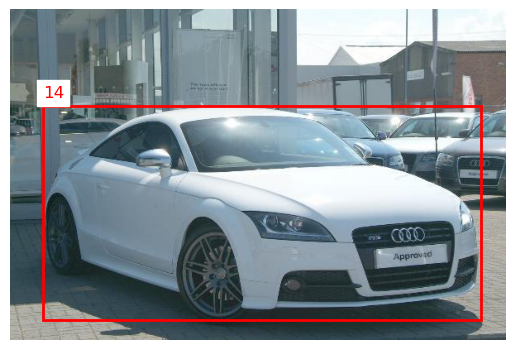

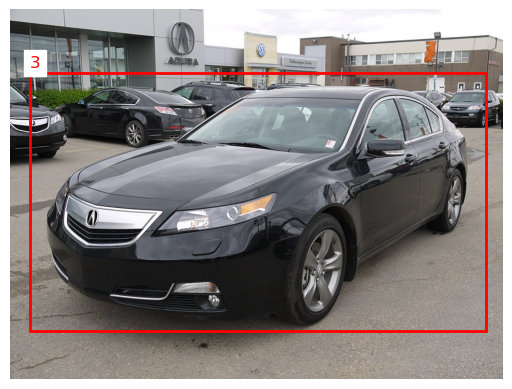

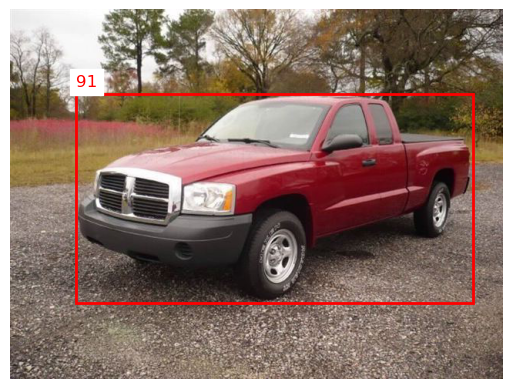

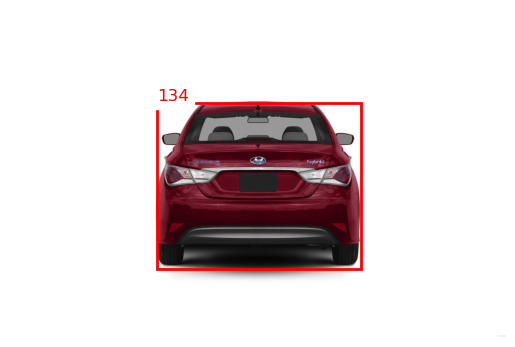

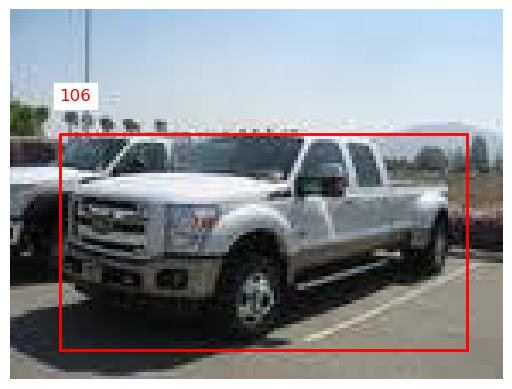

Displayed 5 training images with bounding boxes.
For Testing Images


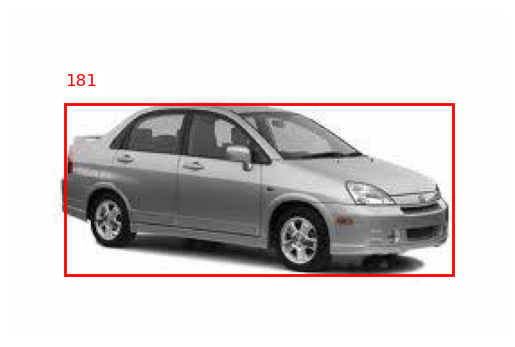

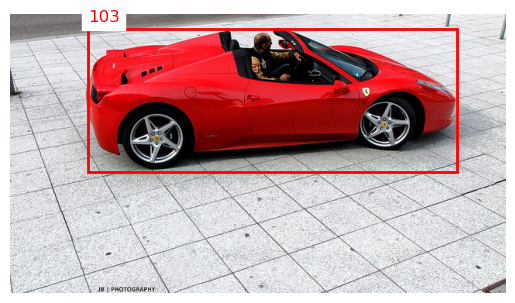

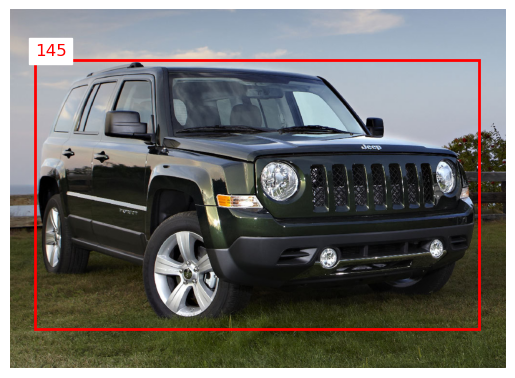

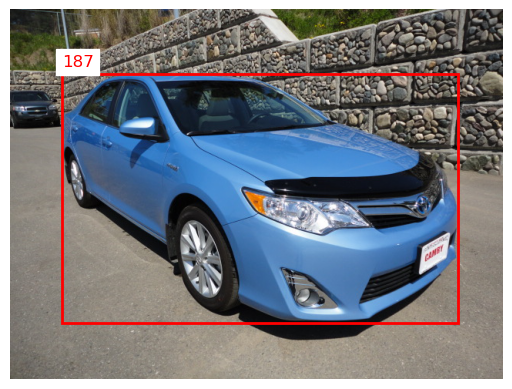

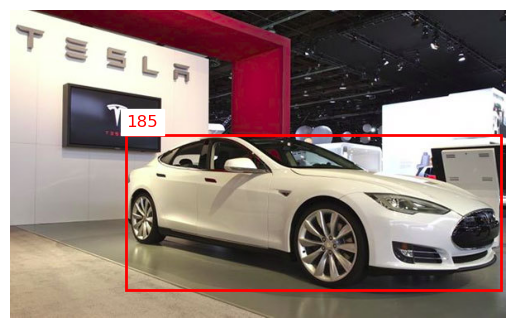

Displayed 5 test images with bounding boxes.


In [34]:

# Display images with bounding boxes
def display_image_with_bbox(image_path, annotation):
    # Load image
    img = Image.open(image_path)

    # Create plot
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Draw bounding box
    x_min = row['Bounding Box coordinates_xmin']
    y_min = row['Bounding Box coordinates_ymin']
    x_max = row['Bounding Box coordinates_xmax']
    y_max = row['Bounding Box coordinates_ymax']
    image_class = row['Image class']
    bbox = annotation['bbox']
    rect = patches.Rectangle(
        (x_min, y_min),  # (x_min, y_min) -  (bbox[0], bbox[1])
        (x_max - x_min),   # width (x_max - x_min)  - bbox[2] - bbox[0]
        (y_max - y_min),   # height (y_max - y_min) -- bbox[3] - bbox[1]
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add class label
    plt.text(
        bbox[0], bbox[1] - 10,  # Position of the label
        annotation['image_class'],
        color='red',
        fontsize=12,
        backgroundcolor='white'
    )

    plt.axis('off')
    plt.show()


# for training images - Rewritten for displaying only five images
print("For Training Images") # Changed message to "Test Image"
displayed_image_count = 0  # Initialize a counter to track displayed images

image_paths_details_training=[]
images_paths_details_testing=[]

for index, row in train_image_annot_dir_file.iterrows():
    if displayed_image_count >= 5: # Check if we've already displayed two images
        break  # If yes, exit the loop

    image_name = str(row['Image Name']).strip()
    image_path = None # Initialize image_path to None


    for class_folder in train_class_folders:
        potential_image_path = os.path.join(class_folder, image_name)
        if os.path.exists(potential_image_path):
            image_path = potential_image_path
            image_paths_details_training.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path: # If image_path is found (not None)
        annotation = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class']
        }
        display_image_with_bbox(image_path, annotation)
        displayed_image_count += 1 # Increment the counter
    #else:
    #    print(f"Training Image not found: {image_name}")

print(f"Displayed {displayed_image_count} training images with bounding boxes.")
#*****************************************************************************************

# for test images - Rewritten for displaying only two images (or adjust as needed)
print("For Testing Images") # Changed message to "Test Image"
displayed_image_count_test = 0  # Initialize a counter to track displayed images

for index, row in test_image_annot_dir_file.iterrows():  # Use test_annotations_df DataFrame
    if displayed_image_count_test >= 5: # Check if we've already displayed two images (adjust number here if you want 5 or more)
        break  # If yes, exit the loop

    image_name_test = str(row['Image Name']).strip()
    image_path_test = None # Initialize image_path_test to None

    for class_folder in test_class_folders: # Use test_class_folders
        potential_image_path_test = os.path.join(class_folder, image_name_test)
        if os.path.exists(potential_image_path_test):
            image_path_test = potential_image_path_test # Assigned to image_path_test
            images_paths_details_testing.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path_test: # If image_path_test is found (not None)
        annotation_test = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class'] # Assuming 'Image class' column also exists in test_annotations_df (verify!)
        }
        display_image_with_bbox(image_path_test, annotation_test)  # Changed here
        displayed_image_count_test += 1 # Increment the counter
    #else:
    #    print(f"Test Image not found: {image_name_test}") # Changed message to "Test Image"

print(f"Displayed {displayed_image_count_test} test images with bounding boxes.") # Changed message to "test images"

## Design, Train, and Test Basic CNN Models to Classify the Car

In [80]:
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Load and preprocess an image for CNN input.
    """
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Warning: Image file not found: {image_path}")
        return None  # Or handle the missing image in a way that makes sense for your application

    image = cv2.imread(image_path)  # Load image

    # Check if image loading was successful
    if image is None:
        print(f"Warning: Failed to load image: {image_path}")
        return None  # Or handle the loading error as needed

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, target_size)  # # Resize to 128x128 pixels (UNet input size)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Apply preprocessing to all images

df_testing['image'] = df_testing['Image_Path'].apply(preprocess_image)
df_training['image'] = df_training['Image_Path'].apply(preprocess_image)

# Check for and handle None values in the 'image' column
df_testing = df_testing.dropna(subset=['image'])  # Remove rows with None in 'image'
df_training = df_training.dropna(subset=['image'])  # Remove rows with None in 'image'

In [81]:
# Encode labels
label_encoder = LabelEncoder()
df_testing['labels_encoded'] = label_encoder.fit_transform(df_testing['labels'])
df_training['labels_encoded'] = label_encoder.fit_transform(df_training['labels'])

# Convert labels to categorical (one-hot encoding)
df_testing['label_categorical'] = df_testing['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))
df_training['label_categorical'] = df_training['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))

In [82]:
def custom_generator(df, batch_size, target_size):
    """
    Custom generator for images and labels.
    """
    num_samples = len(df)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = df.iloc[offset:offset + batch_size]
            images = []
            labels = []
            for _, row in batch_samples.iterrows():
                image = preprocess_image(row['Image_Path'], target_size)
                label = row['label_categorical']
                images.append(image)
                labels.append(label)
            X = np.array(images)
            y = np.array(labels)
            yield X, y

# Create generators
batch_size = 8
train_generator = custom_generator(df_training, batch_size, target_size=(128, 128))
val_generator = custom_generator(df_testing, batch_size, target_size=(128, 128))

In [72]:
# Check training generator
X_batch, y_batch = next(train_generator)
print("Training batch shape:", X_batch.shape, y_batch.shape)

# Check validation generator
X_batch, y_batch = next(val_generator)
print("Validation batch shape:", X_batch.shape, y_batch.shape)

Training batch shape: (8, 128, 128, 3) (8, 196)
Validation batch shape: (8, 128, 128, 3) (8, 196)


In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

train_images = np.random.rand(100, 128, 128, 3) 
train_masks = np.random.rand(100, 128, 128, 1)

def unet_model(input_size=(128, 128, 3)):
    inputs = keras.Input(shape=input_size)
    
    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    # Bottleneck
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    
    # Decoder
    up5 = layers.UpSampling2D(size=(2, 2))(conv4)
    concat5 = layers.Concatenate()([up5, conv3])
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(concat5)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)
    
    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    concat6 = layers.Concatenate()([up6, conv2])
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat6)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)
    
    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    concat7 = layers.Concatenate()([up7, conv1])
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat7)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv7)
    
    model = keras.Model(inputs, outputs)
    return model

# Compile model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train the model
model.fit(train_images, train_masks, epochs=10, batch_size=16, validation_split=0.1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 128, 128, 64)      │           1,792 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 128, 128, 64)      │          36,928 │ conv2d_22[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 64, 64, 64)        │               0 │ conv2d_23[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 64, 64, 128)       │          73,856 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_25 (Conv2D)            │ (None, 64, 64, 128)       │         147,584 │ conv2d_24[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 32, 32, 128)       │               0 │ conv2d_25[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 32, 32, 256)       │         295,168 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_27 (Conv2D)            │ (None, 32, 32, 256)       │         590,080 │ conv2d_26[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_6               │ (None, 16, 16, 256)       │               0 │ conv2d_27[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 16, 16, 512)       │       1,180,160 │ max_pooling2d_6[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_29 (Conv2D)            │ (None, 16, 16, 512)       │       2,359,808 │ conv2d_28[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_4               │ (None, 32, 32, 512)       │               0 │ conv2d_29[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_4 (Concatenate)   │ (None, 32, 32, 768)       │               0 │ up_sampling2d_4[0][0],     │
│                               │                           │                 │ conv2d_27[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_30 (Conv2D)            │ (None, 32, 32, 256)       │       1,769,72

 Total params: 7,782,913 (29.69 MB)

 Trainable params: 7,782,913 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.0000e+00 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.0000e+00 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.0000e+00 - los